In [1]:
# Práctica pórtico plano - Curso 23/24

# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I_II.git

  Cloning https://github.com/EnriqueGarMac/Estructuras_I_II.git to /tmp/pip-req-build-d4tfalya
  Running command git clone --filter=blob:none --quiet https://github.com/EnriqueGarMac/Estructuras_I_II.git /tmp/pip-req-build-d4tfalya
  Resolved https://github.com/EnriqueGarMac/Estructuras_I_II.git to commit 1ec311c3f071482bcc2ec181047124089888a95c
  Preparing metadata (setup.py) ... done
  Created wheel for anastruct: filename=anastruct-0.0.0-py3-none-any.whl size=67673 sha256=912314ca50f6c54aa89d230a800b01bdbad325ad8ad027b764f50bba9abfe5af
  Stored in directory: /tmp/pip-ephem-wheel-cache-iixpv2cg/wheels/3b/3f/0d/b0639b1b66d8022c51fa6b7d7eca03529fcfcb912fc5161a7c
Successfully built anastruct


In [41]:
# Cargamos el software anastruct
from anastruct import SystemElements
import collections
collections.Iterable = collections.abc.Iterable

# Crear objeto para la estructura
ss = SystemElements()

In [34]:
# Variables
H = 4.0 # Altura primer soporte
v = 1.0 # Longitud voladizo
h = 3.0 # Altura del segundo soporte

In [42]:
# Construcción de la estructura

# Añadimos elemento barra 1
ss.add_element(location=[[0, 0], [0, H]]);
# Añadimos elemento barra 2
ss.add_element(location=[[-v, H], [0, H]]);
# Añadimos elemento barra 3
ss.add_element(location=[[0, H], [2, H]], spring={2: 0});
# Añadimos elemento barra 4
ss.add_element(location=[[2, H], [3, H]]);
# Añadimos elemento barra 5
ss.add_element(location=[[3, H], [3, H-h]]);

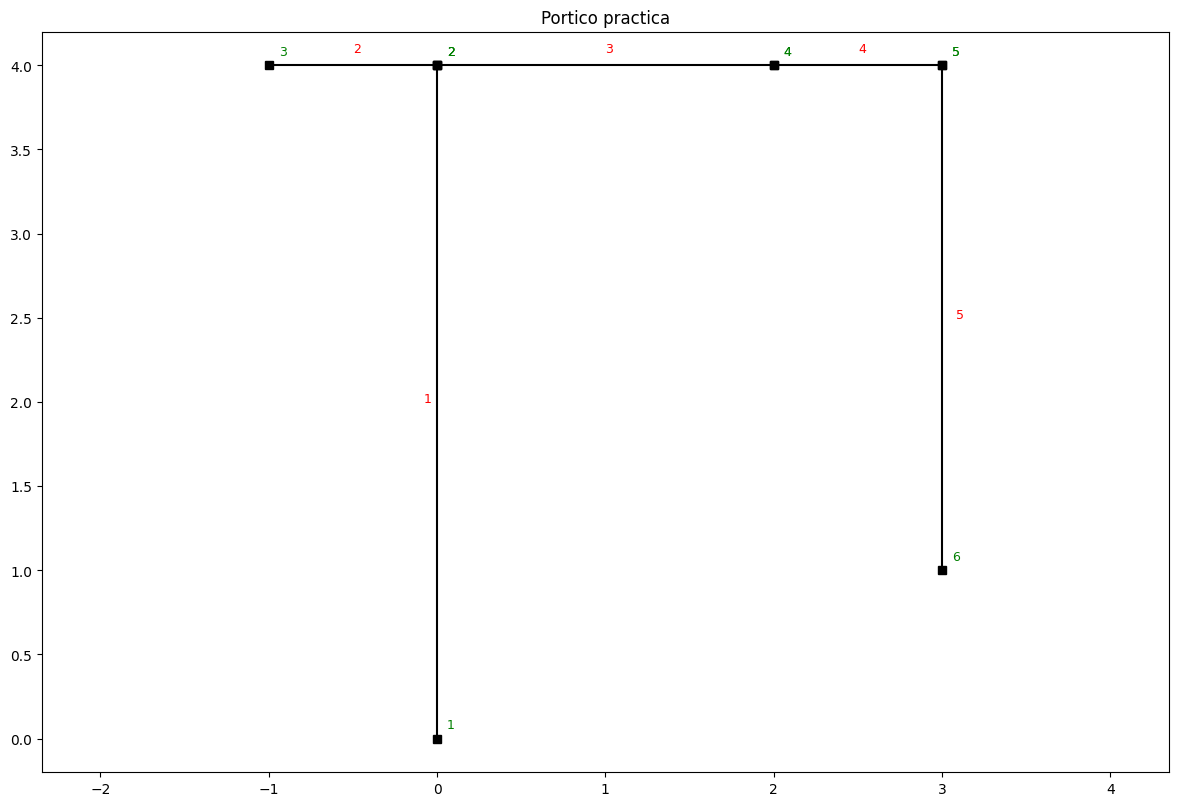

In [36]:
# Mostramos estructura generada
ss.show_structure(title='Portico practica')

In [43]:
# Añadimos apoyo fijo al nodo 1
ss.add_support_fixed(node_id=1)
# Añadimos carrito al nodo 3
ss.add_support_roll(node_id=6, direction=2)

In [44]:
# Añadimos carga triangular barra 1
ss.q_load(element_id=1, q=(6,0))
# Añadimos carga uniforme barra 2
ss.q_load(element_id=2, q=(3,3))
# Añadimos carga uniforme barra 3
ss.q_load(element_id=3, q=(3,3))
# Añadimos carga uniforme barra 4
ss.q_load(element_id=4, q=(3,3))
# Añadimos carga uniforme barra 5
ss.q_load(element_id=5, q=(-2,-2))

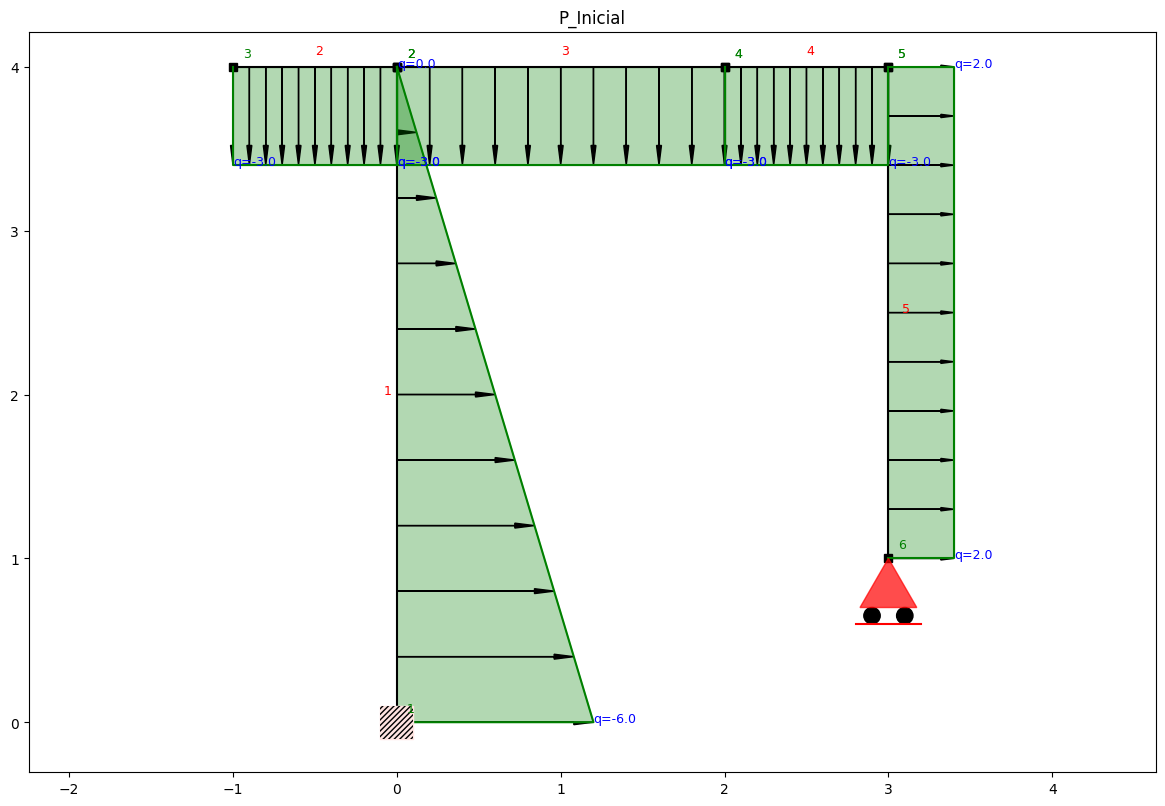

In [45]:
# Mostramos estructura generada
ss.show_structure(title='P_Inicial')

In [46]:
# Resolvemos la estructura
ss.solve();

 
 
Nudo -> Despl. x  Despl. y
**************************************************
1  ->  -0.0   0.0
2  ->  0.0766400038399986   -0.005200000000000089
3  ->  0.0766400038399986   0.02792500158749974
4  ->  0.07744000383999858   -0.0767000034249997
5  ->  0.07784000383999856   0.0015000000000000345
6  ->  0.31789626474781024   0.0


Reacciones
***************************
*Nodo:  1
Reacción Fx:  -18.0
*Nodo:  1
Reacción Fy:  19.5
*Nodo:  1
Momento Mz:  65.5
*Nodo:  6
Reacción Fy:  -7.5


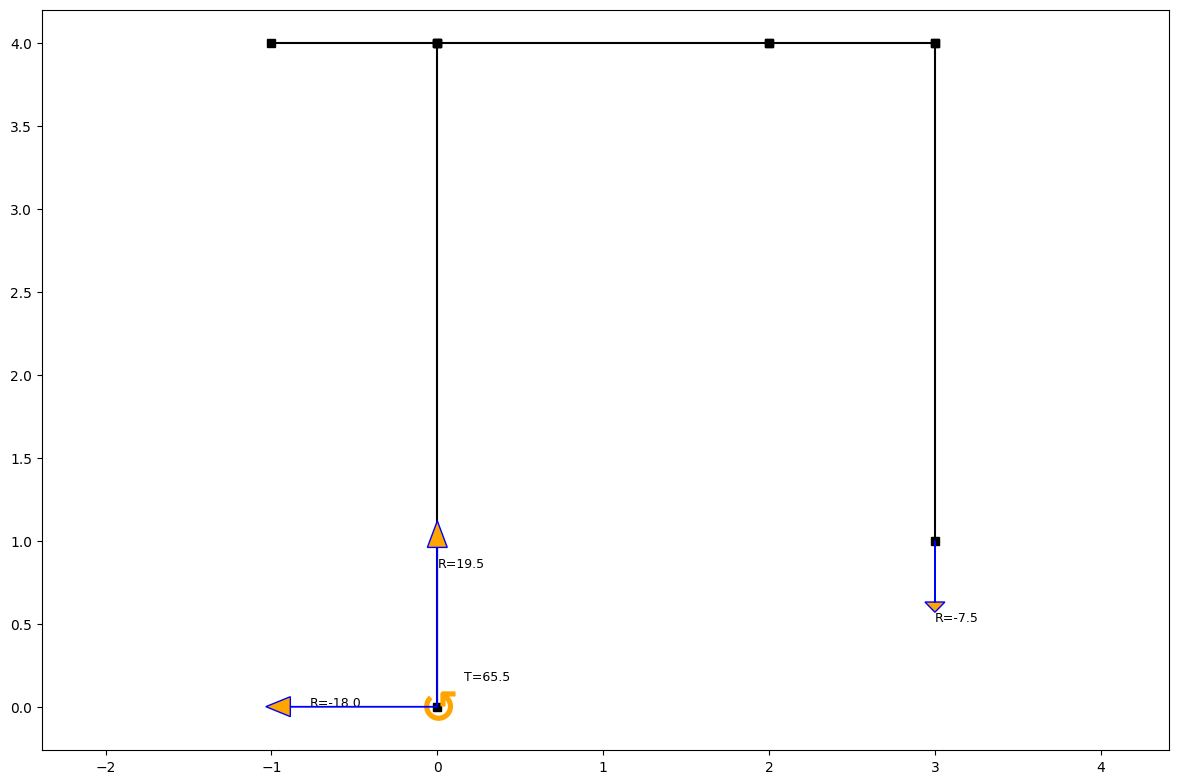

-------------------------------------------


In [47]:
# Mostramos las reacciones
ss.show_reaction_force()

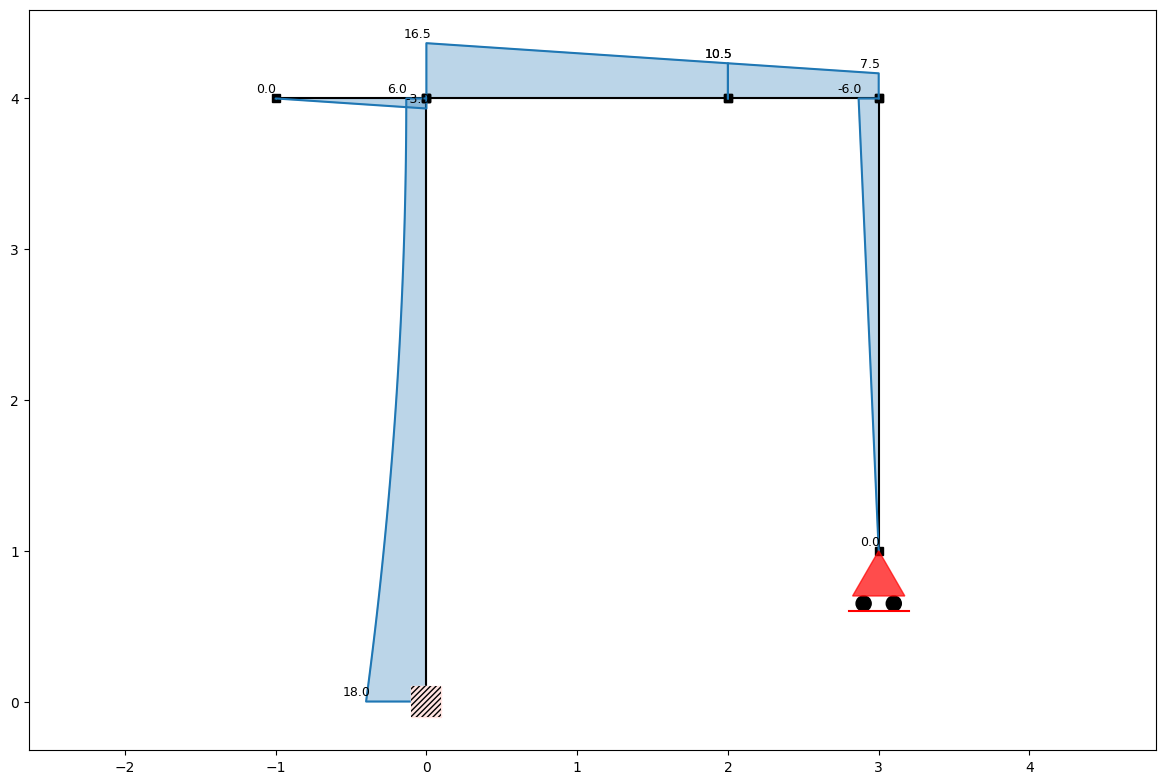

In [48]:
# Mostramos cortantes
ss.show_shear_force()

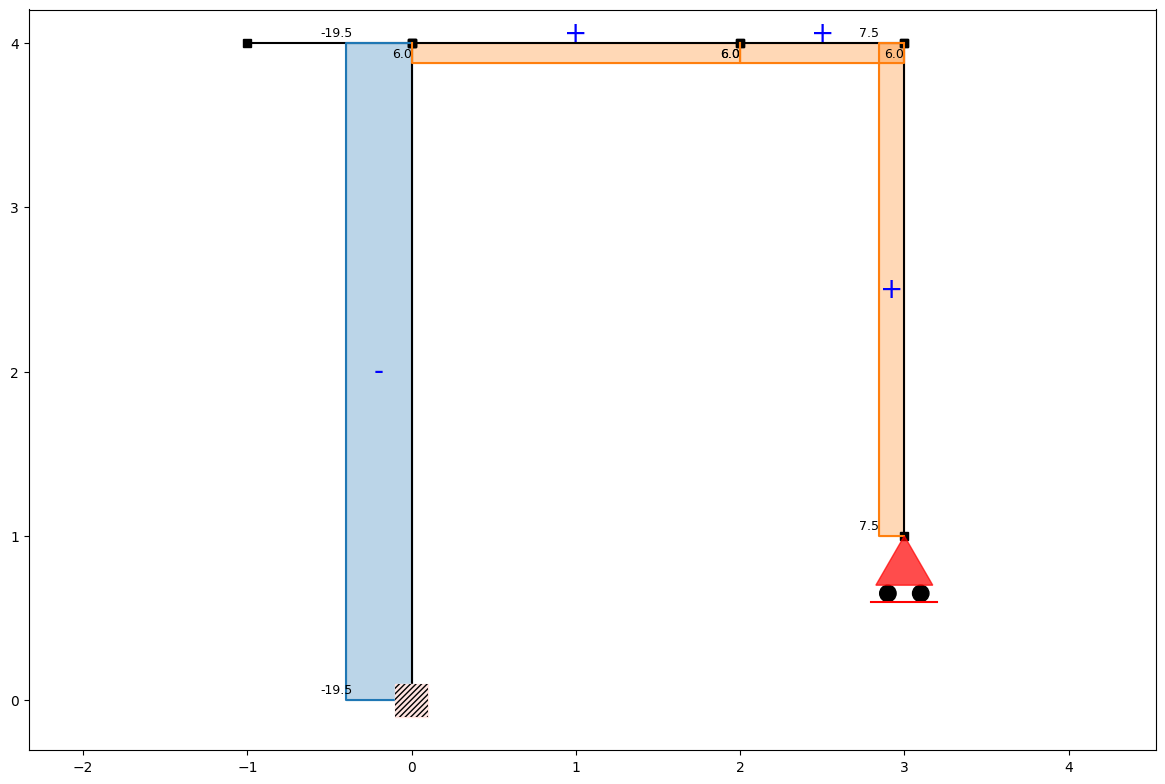

In [49]:
# Axiles
ss.show_axial_force()

Local maximum bending moment - Beam: 1 Mmax:0.0; Position: (x,y) = (-1.0,4.0)
Local maximum bending moment - Beam: 2 Mmax:0.0; Position: (x,y) = (3.0,1.061)


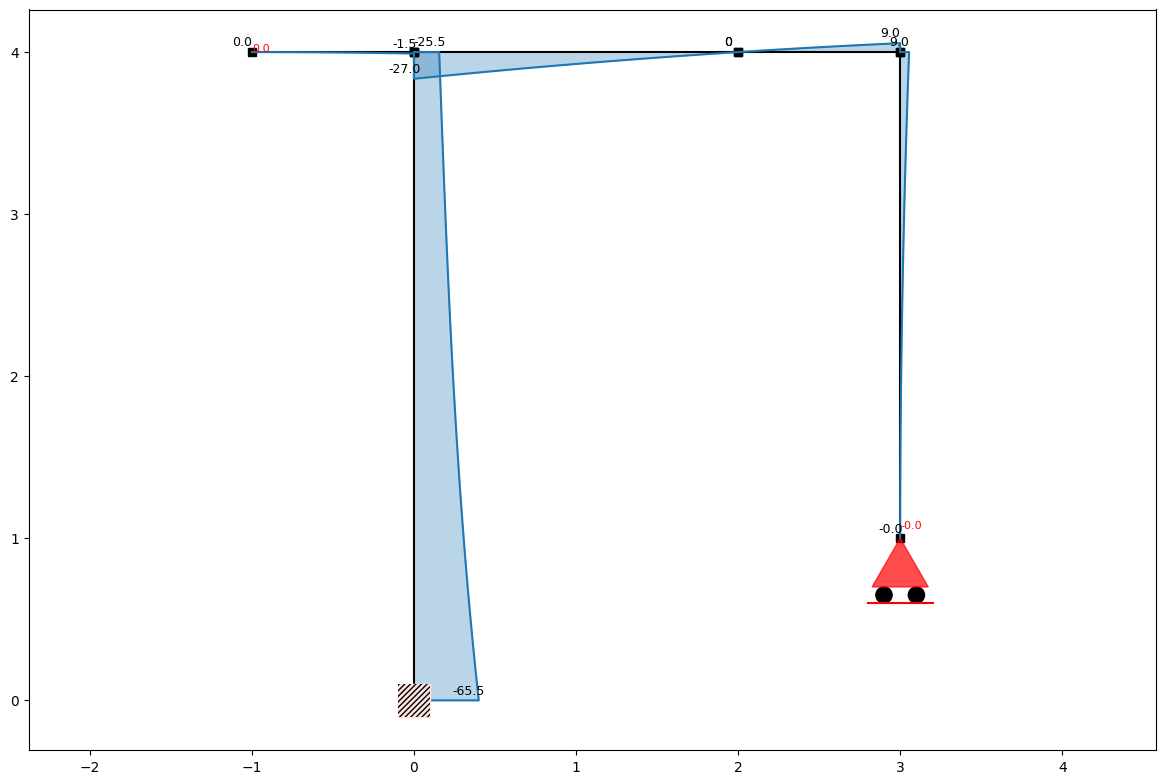

In [50]:
ss.show_bending_moment()

Maximum deflection: 0.0768; Position: (x,y) = (0.0,4.0)
Maximum deflection: 0.0816; Position: (x,y) = (-1.0,4.0)
Maximum deflection: 0.109; Position: (x,y) = (2.0,4.0)
Maximum deflection: 0.109; Position: (x,y) = (2.0,4.0)
Maximum deflection: 0.3179; Position: (x,y) = (3.0,1.0)


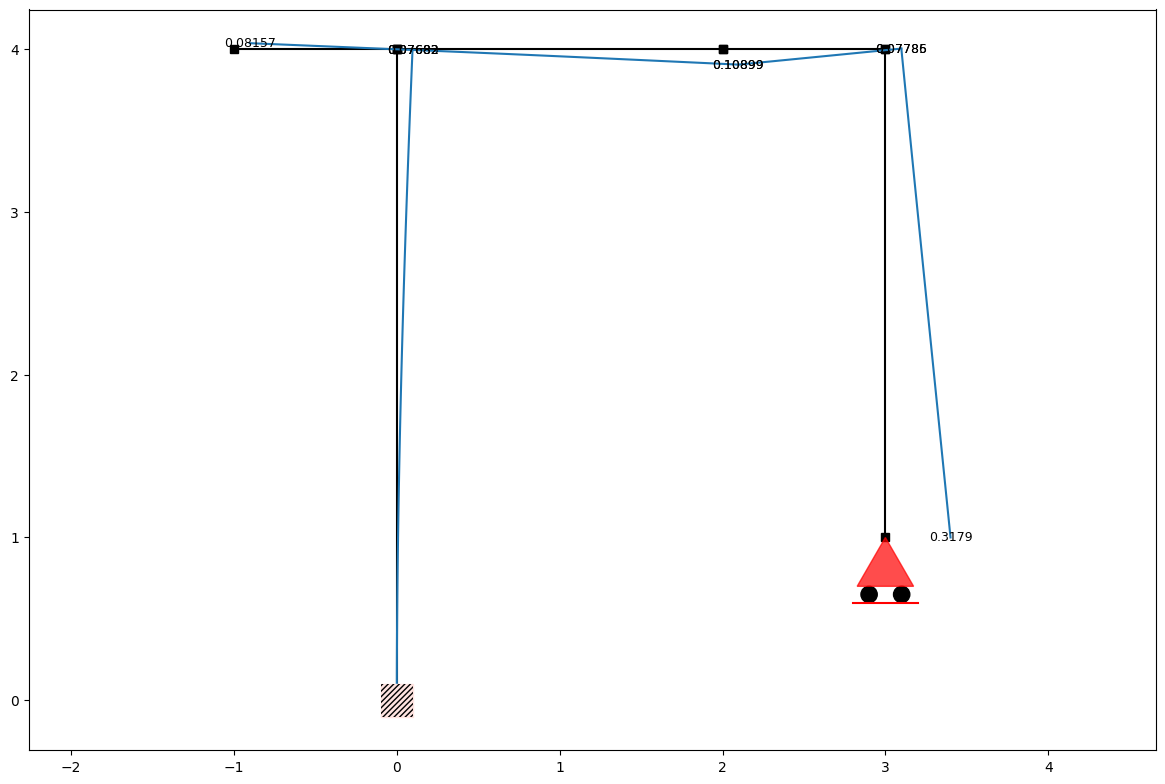

In [51]:
ss.show_displacement()